### Импорт библиотек

In [434]:
from datetime import datetime, timedelta
from faker import Faker 
import pandas as pd
import csv
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import random
import openpyxl
from scipy.stats import mode
import seaborn as sns

### Настройка окружения

In [435]:
fake = Faker()
sns.set_style("darkgrid")

## Обзор данных

In [436]:
dt_specie = pd.read_excel("/home/barry/Documents/PythonProjects/Test/specie_data.xlsx")

In [437]:
dt_specie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Species         75 non-null     object 
 1   Adult height    75 non-null     float64
 2   Child's height  75 non-null     float64
 3   Adult weight    75 non-null     float64
 4   Child's weight  75 non-null     float64
 5   Lifespan        75 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 3.6+ KB


In [438]:
dt_specie.head(5)

,Species,Adult height,Child's height,Adult weight,Child's weight,Lifespan
0,Chinese Alligator,220.0,44.0,45.00,4.500,50
1,Venezuelan Amazon,41.0,8.2,0.34,0.034,60
2,Yellow-faced Amazon,37.0,7.4,0.34,0.034,50
3,Blue-faced Amazon,54.5,10.9,0.52,0.052,70
4,White-tailed wildebeest,120.0,24.0,170.00,17.000,20


In [439]:
dt_specie.tail(5)

,Species,Adult height,Child's height,Adult weight,Child's weight,Lifespan
70,Gorilla,170.0,100.0,200.0,13.0,35
71,Aquila,70.0,30.0,5.0,2.0,15
72,Macropodidae,200.0,40.0,50.0,3.0,50
73,Equus zebra,200.0,80.0,400.0,20.0,30
74,Giraffa camelopardalis,500.0,200.0,1200.0,100.0,40


In [440]:
dt_gd.describe()

,Зрелость,Вес,Рост
count,490.000000,490.000000,490.000000
mean,0.665306,25.783633,45.633653
std,0.472366,145.176272,52.366769
min,0.000000,0.020000,1.040000
25%,0.000000,0.470000,10.390000
50%,1.000000,1.015000,30.375000
75%,1.000000,4.260000,60.290000
max,1.000000,2540.960000,479.010000


### Вывод

ТЕКСТ

# Создание класса итератора

In [441]:
class AnimalRowGenerator:
    def __init__(self,species,n_animals):
        self._species = species
        self._n_animals = int(n_animals)
        self._state_species = 0
        self._state_cur_animals = 0

    def __iter__(self):
        return self

    def __next__(self):

        gender = self.gen_gender()
        birthday = self.gen_birthday()   
        maturity = self.gen_maturity(birthday)
        weight = self.gen_weight(maturity)
        height = self.gen_height(maturity)
        name = self.gen_name()
        
        row = [name,birthday.strftime('%Y-%m-%dT%H:%M:%S') ,self._species["Species"][self._state_species],maturity, weight, height , gender]

        
        self.update_state()

        return row
        

    def update_state(self):
        if self._state_cur_animals == self._n_animals:            
            if self._state_species == len(self._species) - 1:
                self._state_cur_animals = 0
                self._state_species = 0
            else:
                self._state_cur_animals = 0
                self._state_species += 1
        else:
            self._state_cur_animals += 1
 
    def generate_date(self,start_date):
        return fake.date_time_between(start_date=start_date, end_date=datetime.now())
    
    def gen_gender(self):
        numb = random.randint(1, 100)
        if numb >= 40:
            return 'Male'
        else:
            return 'Female'

    def gen_name(self):
        return fake.name()

    def gen_maturity(self, birthday):
        lifespan = self._species['Lifespan'][self._state_species]
        difference = (datetime.now() - birthday).days / 365  
        return difference > 0.3 * lifespan
    
    def gen_birthday(self):
        return self.generate_date(datetime.now() - timedelta(days=365.25 * self._species['Lifespan'][self._state_species]) )
        
    def gen_weight(self, maturity):
        if maturity:
            return round(random.uniform(self._species["Child's weight"][self._state_species], 
                                        self._species['Adult weight'][self._state_species]), 2)
        else:
            return round(random.uniform(1.0, self._species["Child's weight"][self._state_species]), 2)   
            
    def gen_height(self, maturity):
        if maturity:
            return round(random.uniform(self._species["Child's height"][self._state_species], 
                                        self._species['Adult height'][self._state_species]), 2)
        else:
            return round(random.uniform(1.0, self._species["Child's height"][self._state_species]), 2)  

    
    
        

In [449]:
n_animals = 7
animal_generator = AnimalRowGenerator(dt_specie, n_animals)

# Генерация данных

In [443]:
def create_file(file_path, header,  num_rows):
    with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
        workbook = writer.book
        worksheet = workbook.add_worksheet()
        
        # Write the header to the first row
        worksheet.write_row(0, 0, header)
        
        # Generate data rows and write them to the worksheet
        for i in range(num_rows):
            row_data = animal_generator.__next__()
            worksheet.write_row(i + 1, 0, row_data)


In [444]:
your_path = '/home/barry/Documents/DataTest/'
num_rows = 490

In [445]:
animals_file_path = your_path + 'Animval.xlsx'
create_file(animals_file_path, ["Кличка", "Дата появления", "Вид","Зрелость", "Вес", "Рост", "Пол"], num_rows)

In [446]:
dt_gd = pd.read_excel("/home/barry/Documents/DataTest/Animval.xlsx")
dt_gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Кличка          490 non-null    object 
 1   Дата появления  490 non-null    object 
 2   Вид             490 non-null    object 
 3   Зрелость        490 non-null    int64  
 4   Вес             490 non-null    float64
 5   Рост            490 non-null    float64
 6   Пол             490 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 26.9+ KB


In [447]:
dt_gd.head(3)

,Кличка,Дата появления,Вид,Зрелость,Вес,Рост,Пол
0,Jacob Reed,2020-04-08T22:57:21,Chinese Alligator,0,3.83,15.50,Female
1,Louis Ponce,1974-08-30T12:06:53,Chinese Alligator,1,15.04,138.99,Male
2,Roy Griffin,2019-09-10T23:22:03,Chinese Alligator,0,2.70,17.82,Male


In [448]:
dt_gd.tail(3)

,Кличка,Дата появления,Вид,Зрелость,Вес,Рост,Пол
487,Christopher Lawrence,2018-07-04T03:53:14,Fennec,0,0.72,2.68,Male
488,Brian Luna,2015-11-15T07:11:24,Pheasant Tragopan Temminka,1,1.44,86.83,Male
489,Eddie Murphy,2015-11-12T14:37:21,Pheasant Tragopan Temminka,1,1.18,156.84,Male


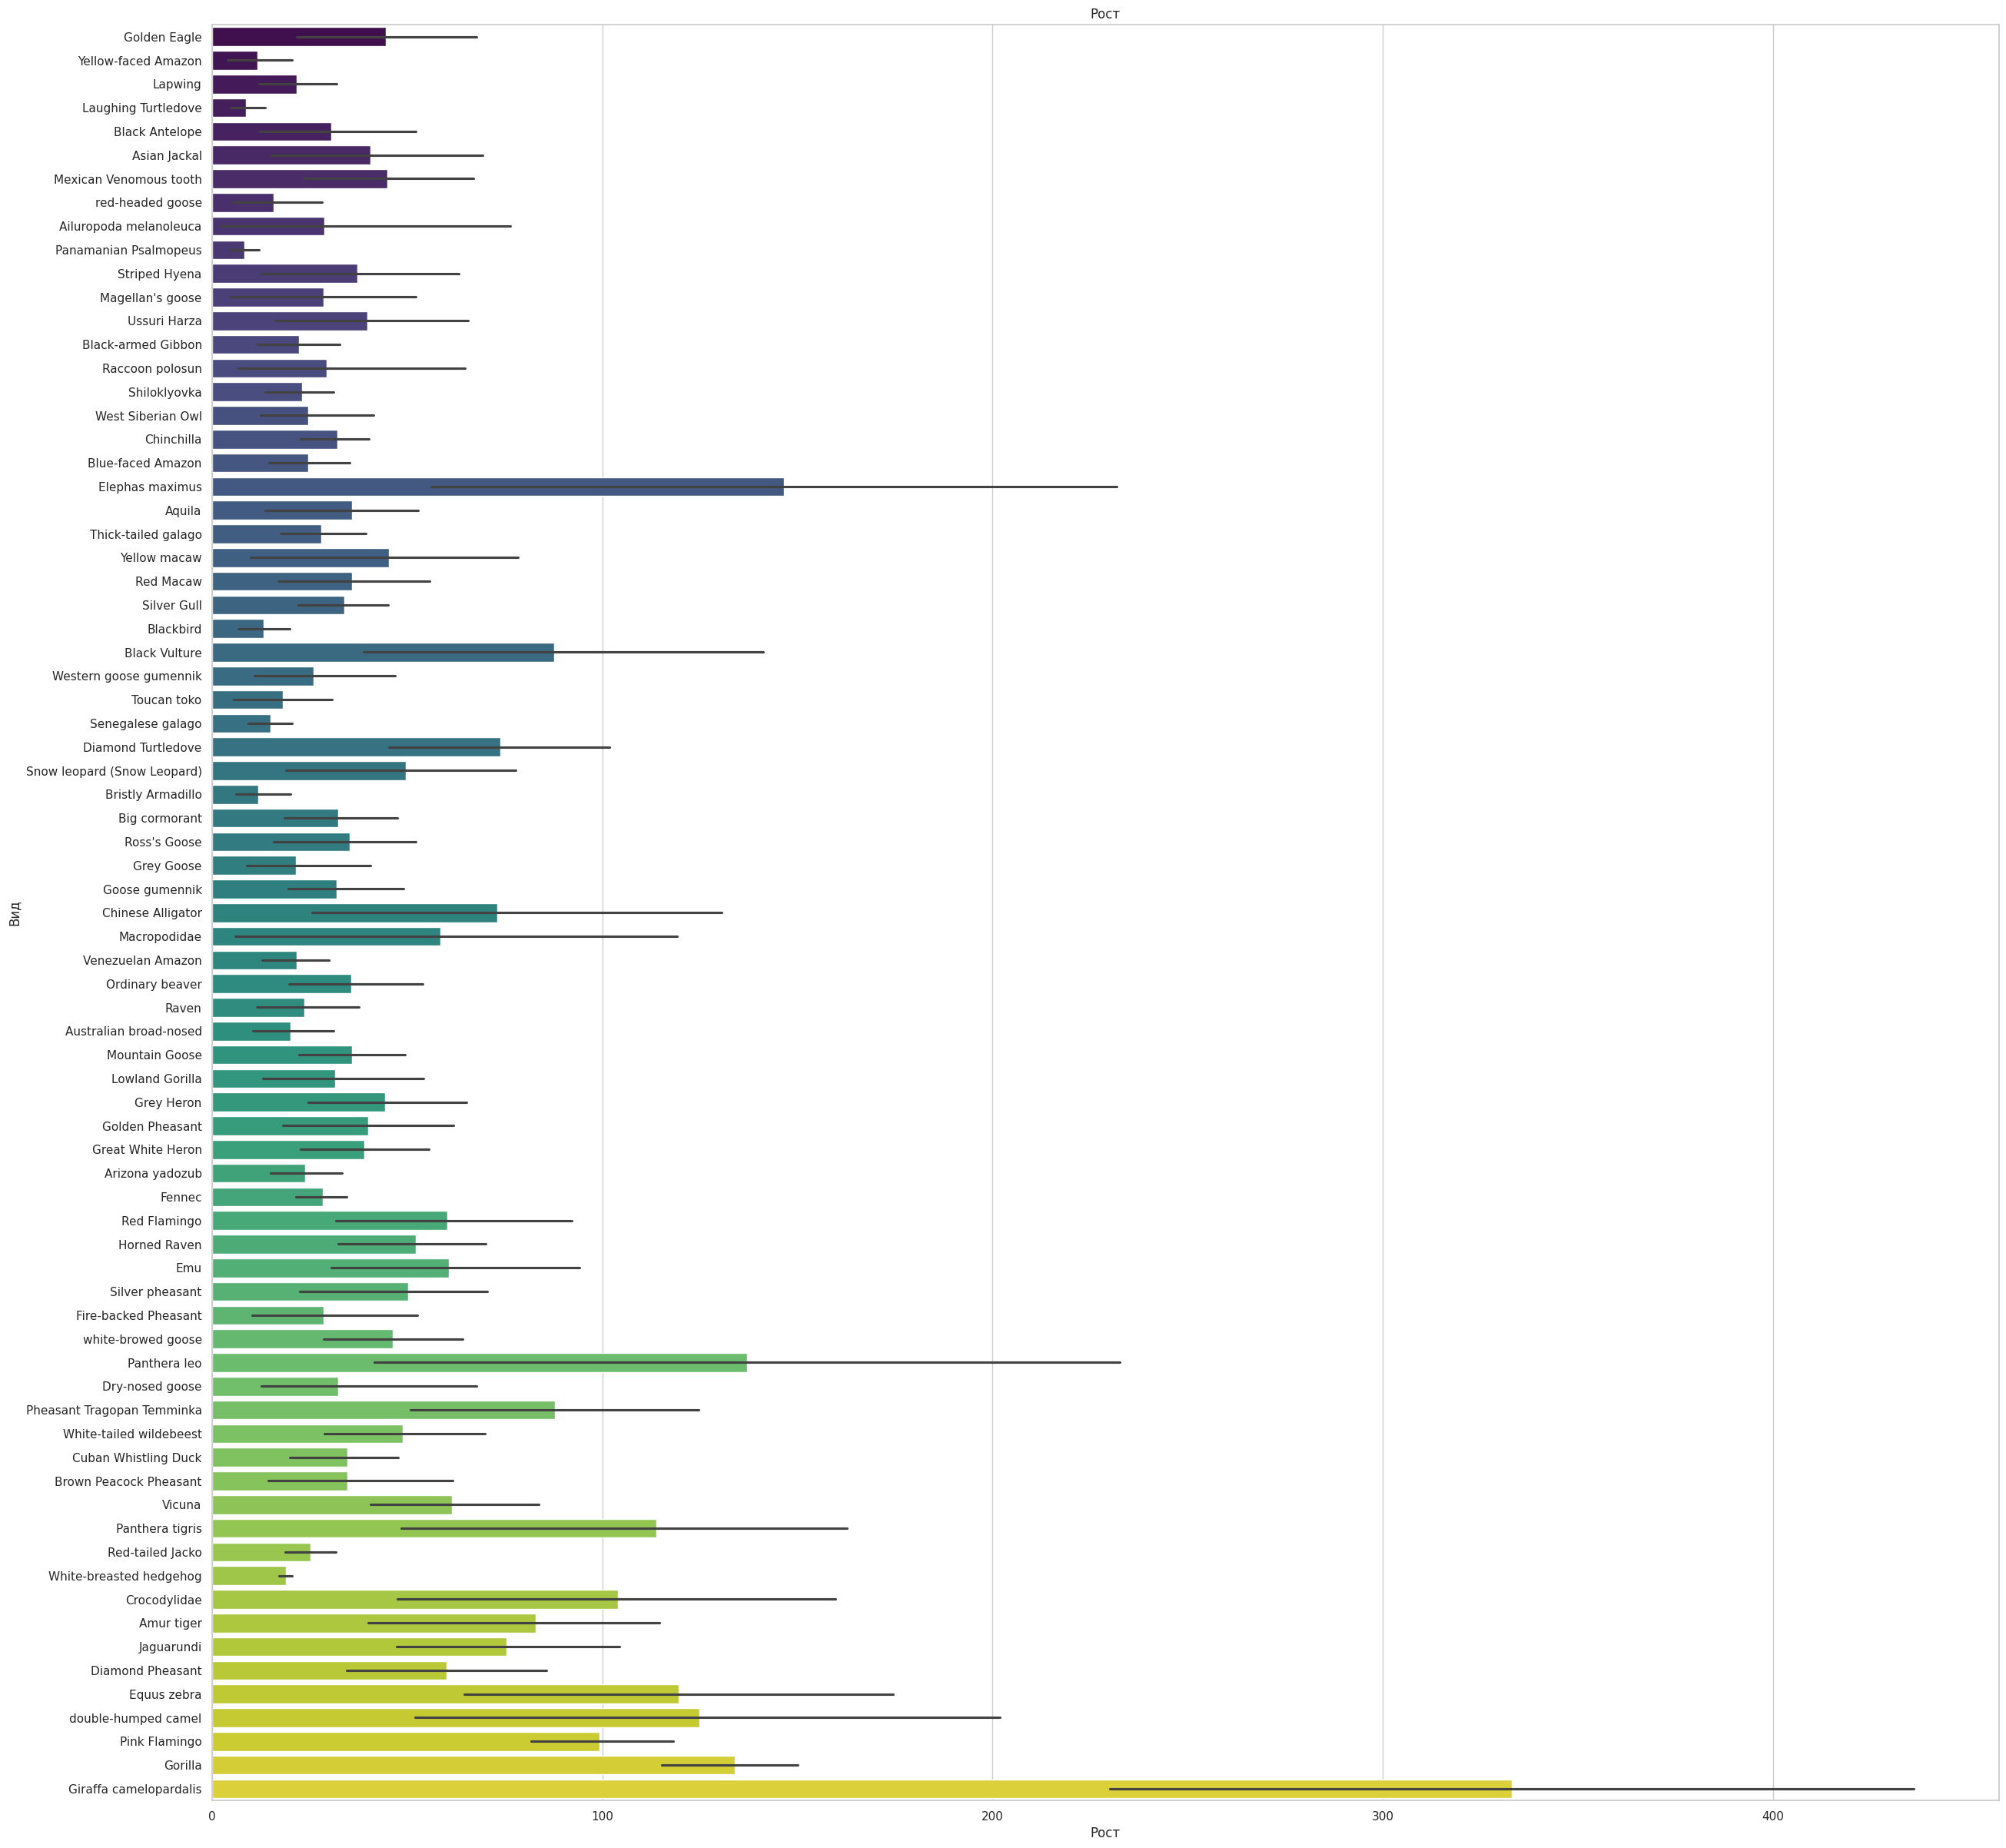

In [425]:
sns.set(style="whitegrid")
dt_gd = dt_gd.sort_values(by='Рост')
plt.figure(figsize=(30, 30))
sns.barplot(x='Рост', y='Вид', hue='Вид', data=dt_gd, palette='viridis', legend=False)

plt.xlabel('Рост')
plt.ylabel('Вид')
plt.title('Рост')

plt.show()


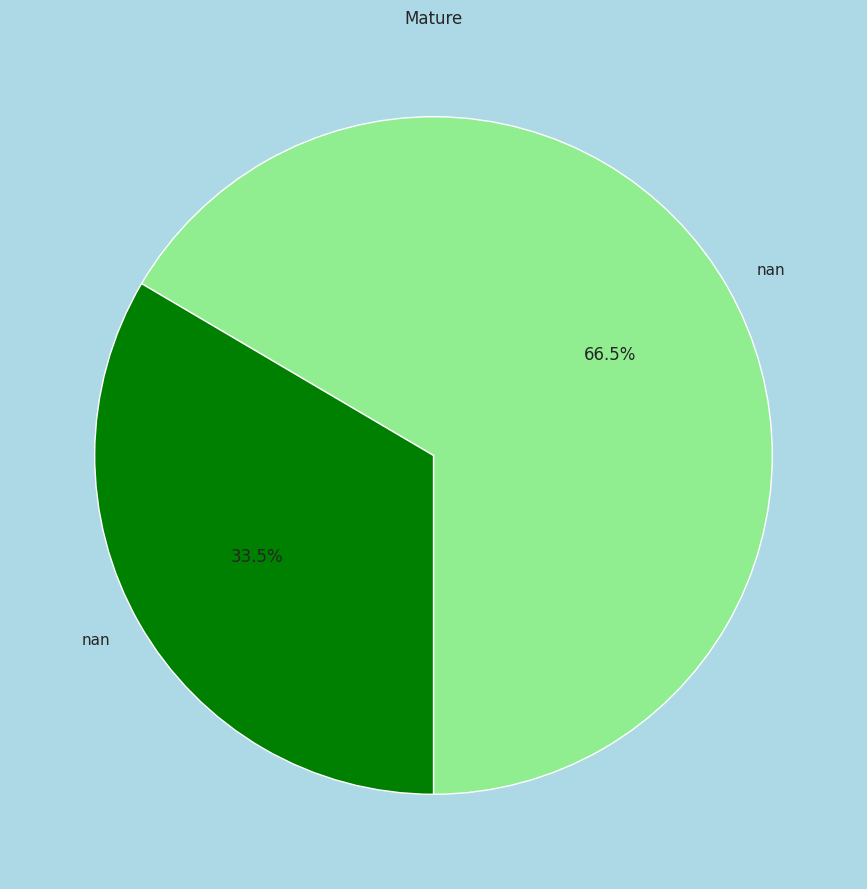

In [426]:
mature_counts = dt_gd['Зрелость'].value_counts()

label_mapping = {True: 'Зрелые', False: 'Незрелые'}
mature_counts.index = mature_counts.index.map(label_mapping)
plt.figure(figsize=(11, 11), facecolor='lightBlue')
plt.pie(mature_counts, labels=mature_counts.index, autopct='%1.01f%%', startangle=270, colors=['LightGreen', 'green'])
plt.title('Mature')
plt.show()

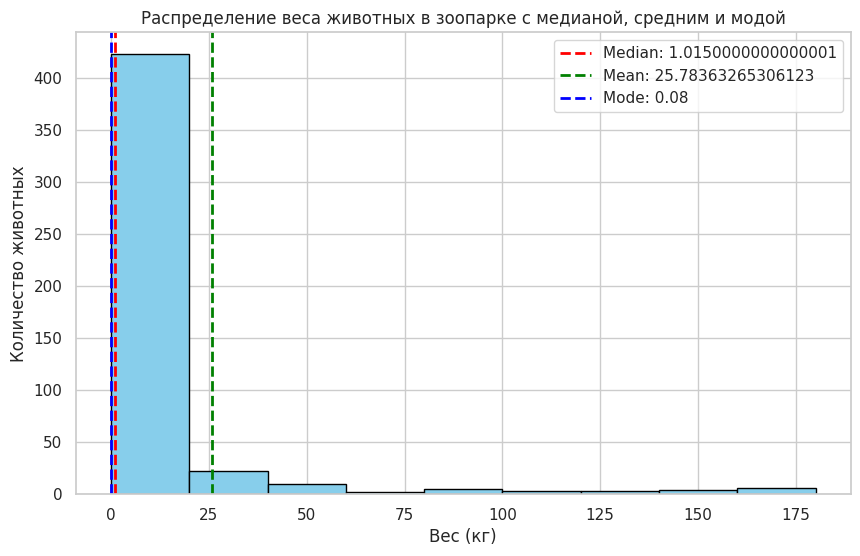

In [427]:

weights = dt_gd['Вес']


plt.figure(figsize=(10, 6))
plt.hist(weights, bins=[0, 20, 40, 60, 80, 100, 120, 140, 160, 180], color='skyblue', edgecolor='black')  


median_weight = np.median(weights)
plt.axvline(median_weight, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_weight}')


mean_weight = np.mean(weights)
plt.axvline(mean_weight, color='green', linestyle='dashed', linewidth=2, label=f'Mean: {mean_weight}')


mode_result = stats.mode(weights)
mode_weight = np.atleast_1d(mode_result.mode)[0] if np.atleast_1d(mode_result.mode).size > 0 else None

if mode_weight is not None:
    plt.axvline(mode_weight, color='blue', linestyle='dashed', linewidth=2, label=f'Mode: {mode_weight}')


plt.legend()


plt.title('Распределение веса животных в зоопарке с медианой, средним и модой')
plt.xlabel('Вес (кг)')
plt.ylabel('Количество животных')
plt.show()